In [71]:
import os
from util_bdt import *

In [72]:
data = pd.read_csv('data/run_30413/run_30413_labelled_tails.csv')
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,max_deviation,class
0,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,3.971222e-03,0.066870,4.085170e-03,11.788794,-310.660036,-25.730102,c1
1,5,5.027961,0.008432,89118.75734,298.836,2.163617,0.009578,0.990102,0.015362,1.285738,0.022480,0.027013,1.080916e-02,0.027301,1.087349e-02,9.229203,-137.513352,-9.011581,c1
2,6,5.025032,0.008807,89401.56098,1577.360,2.252891,0.010268,0.967520,0.016561,1.246196,0.023000,0.029420,3.432170e-03,0.030555,3.514271e-03,7.523369,-512.475697,-24.754859,c1
3,9,5.015114,0.008383,88852.85358,4856.830,2.179301,0.009825,0.951252,0.013167,1.242426,0.020734,-0.178756,4.449393e-07,-0.178756,4.455861e-07,8.138368,-6.032877,-5.766407,c1
4,11,5.040750,0.008590,88556.38748,571.131,2.184355,0.010283,1.020078,0.021741,1.307345,0.028292,0.022602,1.684398e-03,0.025840,1.807494e-03,4.509772,-1595.153796,-55.495744,c1


In [73]:
encoded_df = one_hot_encode_sklearn(data=data, column_name='class')

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
['class_c1' 'class_c2' 'class_c3' 'class_c4']


In [74]:
cols_output_classifier = ['class_c1', 'class_c2', 'class_c3', 'class_c4']
cols_input = ['A_0', 't_p', 'k3', 'k4', 'k5', 'k6']

cols_output = cols_output_classifier + ['integral_R', 'max_deviation']
cols_output_regressor = ['integral_R', 'max_deviation']

In [110]:
splitted_data = train_valid_test(original_df=encoded_df, cols_input=cols_input, cols_output=cols_output, cols_output_classifier=cols_output_classifier, cols_output_regressor=cols_output_regressor)

In [111]:
splitted_data['regressor'].keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])

## Regression models : prediction of max_deviation and integral of the tail

#### Max_deviation prediction

In [112]:
item_to_predict = 'max_deviation'
# Parameter grid for regression
param_grid = {
    # 'max_depth': [3, 4,5,6,7,8,9,10],
    'max_depth' : [5, 7, 10],
    # 'learning_rate': [0.1, 0.05],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
    # 'learning_rate' : [0.2],
    # 'n_estimators': [50, 100, 200],
    'n_estimators': [100000],
    # 'min_child_weight': [1, 3, 5],
    'min_child_weight' : [3, 5, 7],
    # 'subsample': [0.8, 0.9, 1.0],
    'subsample' : [1.0],
    # 'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.8],
    # 'objective': ['reg:squarederror'],  # for regression
    # 'tree_method': ['gpu_hist']
}

# best_params_regressor = gridSearch_Regressor(train_data_dict=splitted_data['regressor'], param_grid=param_grid)
best_params_regressor = gridSearch_Regressor(train_data_dict=splitted_data['regressor'], param_grid=param_grid, item_to_predict=item_to_predict)


Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 26.6302
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 26.4196
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 26.4918

Trying parameters: {'max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.1289
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.0132
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.2, 'n_e

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 21.3347
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 21.7919

Trying parameters: {'max_depth': 5, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 21.8376

Trying parameters: {'max_depth': 5, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 21.7485

Trying parameters: {'max_depth': 5, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_w

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 24.2317

Trying parameters: {'max_depth': 7, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.9008

Trying parameters: {'max_depth': 7, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.7891

Trying parameters: {'max_depth': 7, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 22.5258

Trying parameters: {'max_depth': 7, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 5, 'subs

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 21.9162

Trying parameters: {'max_depth': 7, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 22.6991

Trying parameters: {'max_depth': 7, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 21.7995

Trying parameters: {'max_depth': 7, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 21.4788

Trying parameters: {'max_depth': 7, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subs

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 22.5055

Trying parameters: {'max_depth': 7, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 22.1079

Trying parameters: {'max_depth': 7, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.2957

Trying parameters: {'max_depth': 7, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 22.9638

Trying parameters: {'max_depth': 7, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 7, 'subs

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 24.0143

Trying parameters: {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.6554

Trying parameters: {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.7116

Trying parameters: {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 23.4463

Trying parameters: {'max_depth': 10, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 24.0838

Trying parameters: {'max_depth': 10, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 23.7899

Trying parameters: {'max_depth': 10, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 23.4442

Trying parameters: {'max_depth': 10, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 24.3220

Trying parameters: {'max_depth': 10, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 24.1513

Trying parameters: {'max_depth': 10, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 24.1179

Trying parameters: {'max_depth': 10, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 25.9687

Trying parameters: {'max_depth': 10, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 24.9710

Trying parameters: {'max_depth': 10, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 25.4044

Trying parameters: {'max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 27.1139

Trying parameters: {'max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 26.1930

Trying parameters: {'max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 26.1499

Best parameters found:
Parameters: {'max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae'], 'num_boost_round': 99}
Best RMSE: 21.3347


In [113]:
print(best_params_regressor)

{'max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae'], 'num_boost_round': 99}


In [114]:
regressor_data = splitted_data['regressor']
# xgb_regressor = XGBRegressor_model(best_params=best_params_regressor)

# xgb_regressor.fit(regressor_data['X_train'], regressor_data['y_train'])
import xgboost as xgb
dtrain = dataframe2DMatrix(X=regressor_data['X_train'],y=regressor_data['y_train'][item_to_predict])
dvalid = dataframe2DMatrix(X=regressor_data['X_val'], y=regressor_data['y_val'][item_to_predict])
dtest = dataframe2DMatrix(X=regressor_data['X_test'])
eval_results = {}
xgb_regressor = xgb.train(params=best_params_regressor,
                          dtrain=dtrain,
                          evals=[(dtrain, 'train'), (dvalid, 'eval')],
                          early_stopping_rounds=10000,
                          evals_result=eval_results,
                          verbose_eval=True)
# Make predictions
predictions = xgb_regressor.predict(dtest)

[0]	train-rmse:64.23773	train-mae:47.11901	eval-rmse:64.73404	eval-mae:47.40553
[1]	train-rmse:54.27060	train-mae:38.35135	eval-rmse:54.94251	eval-mae:38.80476
[2]	train-rmse:50.18804	train-mae:34.91075	eval-rmse:50.89711	eval-mae:35.34684
[3]	train-rmse:44.07988	train-mae:30.33787	eval-rmse:45.37103	eval-mae:31.19083
[4]	train-rmse:39.93425	train-mae:27.46024	eval-rmse:41.46937	eval-mae:28.47042
[5]	train-rmse:37.23813	train-mae:25.78626	eval-rmse:39.46362	eval-mae:26.95827
[6]	train-rmse:35.14613	train-mae:24.46132	eval-rmse:37.68835	eval-mae:25.71655
[7]	train-rmse:33.77682	train-mae:23.58203	eval-rmse:36.58789	eval-mae:24.91527
[8]	train-rmse:32.21792	train-mae:22.54755	eval-rmse:35.05067	eval-mae:23.94979
[9]	train-rmse:31.47133	train-mae:22.04166	eval-rmse:34.51559	eval-mae:23.64800


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators", "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


In [115]:
predictions - regressor_data['y_test'][item_to_predict]

3842    -50.820721
6480      4.932023
4521     11.337102
4026     46.122438
10111   -15.715249
           ...    
5474      7.690898
3057    -23.478769
3123    -10.511883
9148    -42.812861
6301     -2.318990
Name: max_deviation, Length: 2048, dtype: float64

In [116]:
# mse = mean_absolute_error(regressor_data['y_test']['integral_R'], pd.DataFrame(predictions, columns=regressor_data['y_test']['integral_R'].columns))
mse = mean_absolute_error(regressor_data['y_test'][item_to_predict], pd.DataFrame(predictions, columns=[item_to_predict]))
mse

23.03482728894473

In [117]:
# pred_df = pd.DataFrame(predictions, columns=regressor_data['y_test'].columns)
pred_df = pd.DataFrame(predictions, columns=[item_to_predict], index=regressor_data['y_test'][item_to_predict].index)


In [118]:
pred_df.to_csv(f'output_bdt/{item_to_predict}_predicted.csv', index=True)
xgb_regressor.save_model(f'output_bdt/{item_to_predict}_model.json')

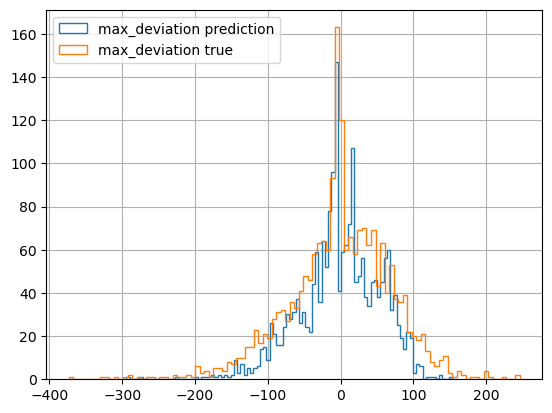

In [119]:
plt.figure()
plt.hist(pred_df[item_to_predict], histtype='step', bins=100, label='max_deviation prediction')
plt.hist(regressor_data['y_test'][item_to_predict], histtype='step', bins=100, label='max_deviation true')
plt.legend()
plt.grid(True)
plt.show()

# plt.figure()
# plt.hist(pred_df['max_deviation'], histtype='step', bins=100, label='max_deviation prediction')
# plt.hist(regressor_data['y_test']['max_deviation'], histtype='step', bins=100, label='max_deviation true')
# plt.legend()
# plt.show()

### integral_R prediction

In [120]:
item_to_predict = 'integral_R'
# Parameter grid for regression
param_grid = {
    # 'max_depth': [3, 4,5,6,7,8,9,10],
    'max_depth' : [5, 7, 10],
    # 'learning_rate': [0.1, 0.05],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
    # 'learning_rate' : [0.2],
    # 'n_estimators': [50, 100, 200],
    'n_estimators': [100000],
    # 'min_child_weight': [1, 3, 5],
    'min_child_weight' : [3, 5, 7],
    # 'subsample': [0.8, 0.9, 1.0],
    'subsample' : [1.0],
    # 'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.8],
    # 'objective': ['reg:squarederror'],  # for regression
    # 'tree_method': ['gpu_hist']
}

# best_params_regressor = gridSearch_Regressor(train_data_dict=splitted_data['regressor'], param_grid=param_grid)
best_params_regressor = gridSearch_Regressor(train_data_dict=splitted_data['regressor'], param_grid=param_grid, item_to_predict=item_to_predict)


Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 418.2607
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 407.5605
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 415.6366

Trying parameters: {'max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 351.0494
New best score!

Trying parameters: {'max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 351.8752

Trying parameters: {'max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 343.8651

Trying parameters: {'max_depth': 5, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 331.6576

Trying parameters: {'max_depth': 5, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 348.0871

Trying parameters: {'max_depth': 5, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 353.5331

Trying parameters: {'max_depth': 5, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 7, '

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 362.1369

Trying parameters: {'max_depth': 7, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 335.2362

Trying parameters: {'max_depth': 7, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 339.9219

Trying parameters: {'max_depth': 7, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 334.5427

Trying parameters: {'max_depth': 7, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 3, '

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 356.1359

Trying parameters: {'max_depth': 7, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 342.8198

Trying parameters: {'max_depth': 7, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 340.7365

Trying parameters: {'max_depth': 7, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 367.2483

Trying parameters: {'max_depth': 7, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 5, '

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 386.4313

Trying parameters: {'max_depth': 7, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 383.3869

Trying parameters: {'max_depth': 7, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 364.2331

Trying parameters: {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 362.8675

Trying parameters: {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 5,

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 363.4096

Trying parameters: {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 352.6136

Trying parameters: {'max_depth': 10, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 362.2982

Trying parameters: {'max_depth': 10, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 354.4901

Trying parameters: {'max_depth': 10, 'learning_rate': 0.2, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 339.6406

Trying parameters: {'max_depth': 10, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 375.6563

Trying parameters: {'max_depth': 10, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 360.1689

Trying parameters: {'max_depth': 10, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 356.8368

Trying parameters: {'max_depth': 10, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 390.6823

Trying parameters: {'max_depth': 10, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 379.4552

Trying parameters: {'max_depth': 10, 'learning_rate': 0.4, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 370.1403

Trying parameters: {'max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 394.6213

Trying parameters: {'max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100
Validation RMSE: 387.0513

Trying parameters: {'max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae']}
Number of rounds: 100


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation RMSE: 389.7674

Best parameters found:
Parameters: {'max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae'], 'num_boost_round': 99}
Best RMSE: 329.4564


In [121]:
print(best_params_regressor)

{'max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 100000, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'eval_metric': ['rmse', 'mae'], 'num_boost_round': 99}


In [122]:
regressor_data = splitted_data['regressor']
# xgb_regressor = XGBRegressor_model(best_params=best_params_regressor)

# xgb_regressor.fit(regressor_data['X_train'], regressor_data['y_train'])
import xgboost as xgb
dtrain = dataframe2DMatrix(X=regressor_data['X_train'],y=regressor_data['y_train'][item_to_predict])
dvalid = dataframe2DMatrix(X=regressor_data['X_val'], y=regressor_data['y_val'][item_to_predict])
dtest = dataframe2DMatrix(X=regressor_data['X_test'])
eval_results = {}
xgb_regressor = xgb.train(params=best_params_regressor,
                          dtrain=dtrain,
                          evals=[(dtrain, 'train'), (dvalid, 'eval')],
                          early_stopping_rounds=10000,
                          evals_result=eval_results,
                          verbose_eval=True)
# Make predictions
predictions = xgb_regressor.predict(dtest)

[0]	train-rmse:1058.32455	train-mae:739.87033	eval-rmse:1081.53022	eval-mae:751.92655
[1]	train-rmse:894.78191	train-mae:608.32192	eval-rmse:913.67229	eval-mae:619.60828
[2]	train-rmse:808.09862	train-mae:544.69738	eval-rmse:833.52752	eval-mae:557.39339
[3]	train-rmse:710.58321	train-mae:473.47694	eval-rmse:744.62949	eval-mae:487.22023
[4]	train-rmse:648.27132	train-mae:430.44798	eval-rmse:691.33172	eval-mae:446.76815
[5]	train-rmse:609.20189	train-mae:402.03704	eval-rmse:657.28850	eval-mae:421.10314
[6]	train-rmse:569.25942	train-mae:376.04590	eval-rmse:619.01633	eval-mae:398.26779
[7]	train-rmse:544.20788	train-mae:360.30529	eval-rmse:600.39487	eval-mae:385.58717
[8]	train-rmse:515.35197	train-mae:343.25470	eval-rmse:573.90172	eval-mae:371.41610
[9]	train-rmse:497.77069	train-mae:331.45012	eval-rmse:558.36776	eval-mae:361.84861


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:41:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "n_estimators", "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


In [123]:
predictions - regressor_data['y_test'][item_to_predict]

3842    -203.325107
6480     -20.092688
4521     716.497270
4026     765.264708
10111     57.087242
            ...    
5474    -474.049068
3057     -51.596888
3123     -65.088135
9148    -950.764032
6301    -167.522542
Name: integral_R, Length: 2048, dtype: float64

In [124]:
# mse = mean_absolute_error(regressor_data['y_test']['integral_R'], pd.DataFrame(predictions, columns=regressor_data['y_test']['integral_R'].columns))
mse = mean_absolute_error(regressor_data['y_test'][item_to_predict], pd.DataFrame(predictions, columns=[item_to_predict]))
mse

354.97507319695535

In [125]:
# pred_df = pd.DataFrame(predictions, columns=regressor_data['y_test'].columns)
pred_df = pd.DataFrame(predictions, columns=[item_to_predict], index=regressor_data['y_test'][item_to_predict].index)


In [127]:
pred_df.to_csv(f'output_bdt/{item_to_predict}_predicted.csv', index=True)
xgb_regressor.save_model(f'output_bdt/{item_to_predict}_model.json')

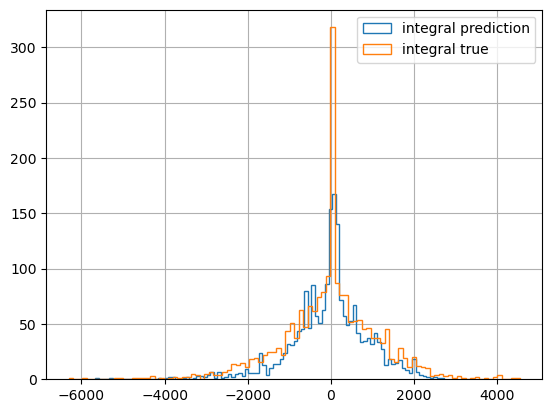

In [128]:
plt.figure()
plt.hist(pred_df[item_to_predict], histtype='step', bins=100, label='integral prediction')
plt.hist(regressor_data['y_test'][item_to_predict], histtype='step', bins=100, label='integral true')
plt.legend()
plt.grid(True)
plt.show()

# plt.figure()
# plt.hist(pred_df['max_deviation'], histtype='step', bins=100, label='max_deviation prediction')
# plt.hist(regressor_data['y_test']['max_deviation'], histtype='step', bins=100, label='max_deviation true')
# plt.legend()
# plt.show()

## Classification model : classification of the response using the max_deviation and integral_R

In [129]:
# Prepare your data
# targets = ['class_c1', 'class_c2', 'class_c3', 'class_c4']


# X = encoded_df[['A_0', 't_p', 'k3', 'k4', 'k5', 'k6']]
# y_classifier = encoded_df[targets]
# y_regressor = encoded_df[['integral_R', 'max_deviation']]

classifier_data = splitted_data['classifier']

In [131]:
# Convert to DMatrix for XGBoost
dtrain = dataframe2DMatrix(classifier_data['X_train'], y=classifier_data['y_train'])
dval = dataframe2DMatrix(classifier_data['X_val'], y=classifier_data['y_val'])
dtest = dataframe2DMatrix(classifier_data['X_test'])

In [132]:
# Set parameters
params = {
    # 'max_depth': 3,
    # 'learning_rate': 0.1,
    'learning_rate': 0.05, 'max_depth': 3,
    'objective': 'binary:logistic',  # for classification
    'eval_metric': 'logloss',
    'tree_method' : 'gpu_hist'
}

# Specify evaluation sets
evals = [(dtrain, 'train'), (dval, 'validation')]

# Train model
model_classifier = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    # num_boost_round = 200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	train-logloss:0.51730	validation-logloss:0.51723
[1]	train-logloss:0.47774	validation-logloss:0.47761
[2]	train-logloss:0.44306	validation-logloss:0.44288
[3]	train-logloss:0.41225	validation-logloss:0.41203
[4]	train-logloss:0.38419	validation-logloss:0.38401
[5]	train-logloss:0.35883	validation-logloss:0.35869
[6]	train-logloss:0.33576	validation-logloss:0.33565
[7]	train-logloss:0.31467	validation-logloss:0.31459
[8]	train-logloss:0.29530	validation-logloss:0.29525
[9]	train-logloss:0.27745	validation-logloss:0.27742
[10]	train-logloss:0.26096	validation-logloss:0.26095
[11]	train-logloss:0.24567	validation-logloss:0.24568
[12]	train-logloss:0.23146	validation-logloss:0.23150
[13]	train-logloss:0.21823	validation-logloss:0.21832
[14]	train-logloss:0.20590	validation-logloss:0.20603
[15]	train-logloss:0.19438	validation-logloss:0.19455
[16]	train-logloss:0.18361	validation-logloss:0.18382
[17]	train-logloss:0.17352	validation-logloss:0.17377
[18]	train-logloss:0.16407	validation-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:49:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[48]	train-logloss:0.03477	validation-logloss:0.03557
[49]	train-logloss:0.03310	validation-logloss:0.03392
[50]	train-logloss:0.03152	validation-logloss:0.03235
[51]	train-logloss:0.03005	validation-logloss:0.03089
[52]	train-logloss:0.02863	validation-logloss:0.02947
[53]	train-logloss:0.02727	validation-logloss:0.02813
[54]	train-logloss:0.02598	validation-logloss:0.02686
[55]	train-logloss:0.02476	validation-logloss:0.02564
[56]	train-logloss:0.02363	validation-logloss:0.02451
[57]	train-logloss:0.02252	validation-logloss:0.02342
[58]	train-logloss:0.02147	validation-logloss:0.02239
[59]	train-logloss:0.02047	validation-logloss:0.02140
[60]	train-logloss:0.01953	validation-logloss:0.02046
[61]	train-logloss:0.01863	validation-logloss:0.01958
[62]	train-logloss:0.01780	validation-logloss:0.01875
[63]	train-logloss:0.01699	validation-logloss:0.01795
[64]	train-logloss:0.01621	validation-logloss:0.01719
[65]	train-logloss:0.01548	validation-logloss:0.01646
[66]	train-logloss:0.01477	v

In [140]:
model_classifier.save_model(f'output_bdt/classifier_resp_model.json')

In [133]:
# Make predictions
preds = model_classifier.predict(dtest)
preds

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:49:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


array([[9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       [1.8311235e-04, 2.7918696e-04, 2.5108046e-04, 9.9971956e-01],
       [9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       ...,
       [9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       [1.8311235e-04, 1.8622862e-04, 2.5108046e-04, 9.9971956e-01],
       [1.8311235e-04, 1.8622862e-04, 2.5108046e-04, 9.9971956e-01]],
      dtype=float32)

In [134]:
columns = cols_output_classifier
predClass_df = pd.DataFrame(preds, index=classifier_data['X_test'].index, columns=columns)
predClass_df

,class_c1,class_c2,class_c3,class_c4
3842,0.999725,0.000186,0.000252,0.00020
6480,0.000183,0.000279,0.000251,0.99972
4521,0.999725,0.000186,0.000252,0.00020
4026,0.999725,0.000186,0.000252,0.00020
10111,0.000183,0.000186,0.000251,0.99972
...,...,...,...,...
5474,0.000183,0.000186,0.000251,0.99972
3057,0.999725,0.000186,0.000252,0.00020
3123,0.999725,0.000186,0.000252,0.00020
9148,0.000183,0.000186,0.000251,0.99972


In [135]:
predClass_df['predicted_class'] = predClass_df.idxmax(axis=1)
predClass_df

,class_c1,class_c2,class_c3,class_c4,predicted_class
3842,0.999725,0.000186,0.000252,0.00020,class_c1
6480,0.000183,0.000279,0.000251,0.99972,class_c4
4521,0.999725,0.000186,0.000252,0.00020,class_c1
4026,0.999725,0.000186,0.000252,0.00020,class_c1
10111,0.000183,0.000186,0.000251,0.99972,class_c4
...,...,...,...,...,...
5474,0.000183,0.000186,0.000251,0.99972,class_c4
3057,0.999725,0.000186,0.000252,0.00020,class_c1
3123,0.999725,0.000186,0.000252,0.00020,class_c1
9148,0.000183,0.000186,0.000251,0.99972,class_c4


In [136]:
test_df = pd.concat([classifier_data['X_test'], pd.DataFrame(classifier_data['y_test'].idxmax(axis=1), columns=['trueClass']), predClass_df['predicted_class']], axis=1)
test_df

,integral_R,max_deviation,trueClass,predicted_class
3842,-2301.010830,-86.686725,class_c1,class_c1
6480,15.333931,3.782113,class_c4,class_c4
4521,-994.845933,-22.102865,class_c1,class_c1
4026,-1137.906462,-32.975760,class_c1,class_c1
10111,589.095070,59.747377,class_c4,class_c4
...,...,...,...,...
5474,1116.573543,71.409375,class_c4,class_c4
3057,-512.107397,-44.297583,class_c1,class_c1
3123,-926.358642,-46.112591,class_c1,class_c1
9148,2457.102655,104.155336,class_c4,class_c4


In [137]:
Accuracy = (np.sum(test_df['trueClass']==test_df['predicted_class'])/len(test_df['trueClass']))*100
print(f'Accuracy of the prediction = {np.round(Accuracy,5)}%')

Accuracy of the prediction = 100.0%


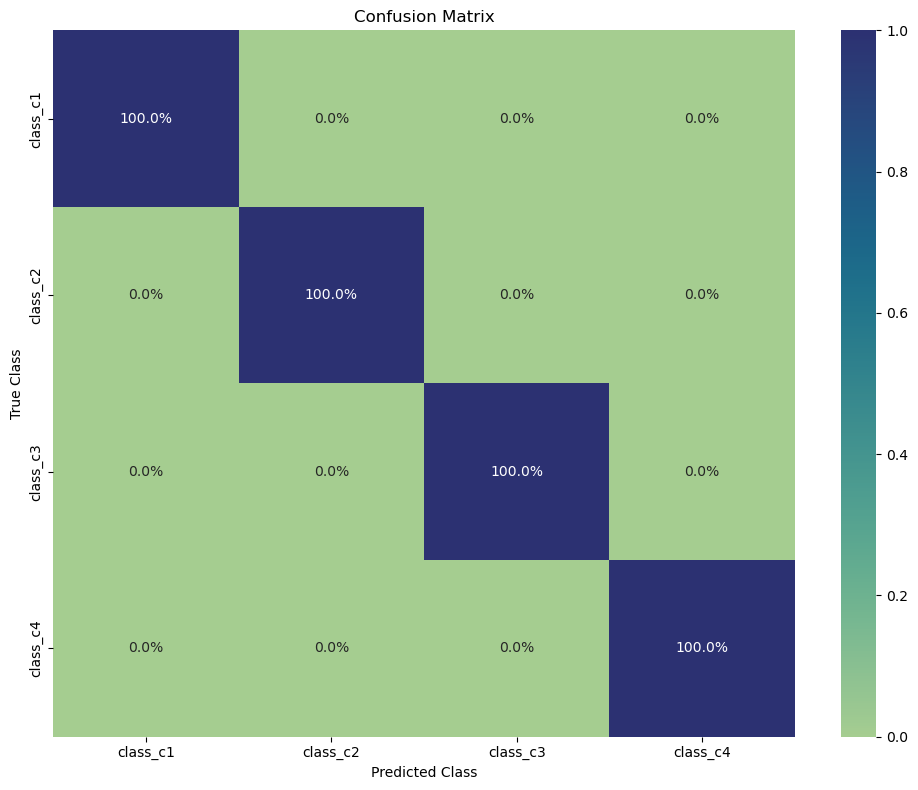

In [139]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true=test_df['trueClass'], y_pred=test_df['predicted_class'])

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Create heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='crest',
            # xticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'],  # If your classes are 0-4
            # yticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])  # If your classes are 0-4
            xticklabels=cols_output_classifier,
            yticklabels=cols_output_classifier)

# Add labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

# Show plot
plt.tight_layout()
plt.show()

## Test of the classifier on the output of the regressor models

In [160]:
integral_R_predicted = pd.read_csv('output_bdt/integral_R_predicted.csv')
max_deviation_predicted = pd.read_csv('output_bdt/max_deviation_predicted.csv')

In [161]:
integral_R_predicted.columns = ['index', 'integral_R']
integral_R_predicted

,index,integral_R
0,3842,-2504.336000
1,6480,-4.758757
2,4521,-278.348660
3,4026,-372.641750
4,10111,646.182300
...,...,...
2043,5474,642.524500
2044,3057,-563.704300
2045,3123,-991.446800
2046,9148,1506.338600


In [162]:
max_deviation_predicted.columns = ['index', 'max_deviation']
max_deviation_predicted

,index,max_deviation
0,3842,-137.507450
1,6480,8.714136
2,4521,-10.765763
3,4026,13.146678
4,10111,44.032127
...,...,...
2043,5474,79.100270
2044,3057,-67.776350
2045,3123,-56.624474
2046,9148,61.342476


In [178]:
output_regressor_df = pd.merge(integral_R_predicted, max_deviation_predicted, on='index', how='inner')
# output_regressor_df = output_regressor_df.set_index('index')

In [179]:
output_regressor_df

,index,integral_R,max_deviation
0,3842,-2504.336000,-137.507450
1,6480,-4.758757,8.714136
2,4521,-278.348660,-10.765763
3,4026,-372.641750,13.146678
4,10111,646.182300,44.032127
...,...,...,...
2043,5474,642.524500,79.100270
2044,3057,-563.704300,-67.776350
2045,3123,-991.446800,-56.624474
2046,9148,1506.338600,61.342476


In [180]:
c = classifier_data['X_test'].copy().reset_index()

In [182]:
c.columns = ['index', 'true_integral_R', 'true_max_deviation']

In [183]:
c

,index,true_integral_R,true_max_deviation
0,3842,-2301.010830,-86.686725
1,6480,15.333931,3.782113
2,4521,-994.845933,-22.102865
3,4026,-1137.906462,-32.975760
4,10111,589.095070,59.747377
...,...,...,...
2043,5474,1116.573543,71.409375
2044,3057,-512.107397,-44.297583
2045,3123,-926.358642,-46.112591
2046,9148,2457.102655,104.155336


In [187]:
input_classifier_df  = pd.merge(output_regressor_df, c, on='index', how='inner')
input_classifier_df = pd.merge(input_classifier_df,  classifier_data['y_test'].reset_index(), on='index', how='inner')

In [188]:
input_classifier_df

,index,integral_R,max_deviation,true_integral_R,true_max_deviation,class_c1,class_c2,class_c3,class_c4
0,3842,-2504.336000,-137.507450,-2301.010830,-86.686725,1.0,0.0,0.0,0.0
1,6480,-4.758757,8.714136,15.333931,3.782113,0.0,0.0,0.0,1.0
2,4521,-278.348660,-10.765763,-994.845933,-22.102865,1.0,0.0,0.0,0.0
3,4026,-372.641750,13.146678,-1137.906462,-32.975760,1.0,0.0,0.0,0.0
4,10111,646.182300,44.032127,589.095070,59.747377,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2043,5474,642.524500,79.100270,1116.573543,71.409375,0.0,0.0,0.0,1.0
2044,3057,-563.704300,-67.776350,-512.107397,-44.297583,1.0,0.0,0.0,0.0
2045,3123,-991.446800,-56.624474,-926.358642,-46.112591,1.0,0.0,0.0,0.0
2046,9148,1506.338600,61.342476,2457.102655,104.155336,0.0,0.0,0.0,1.0


In [191]:
dtest_fromPrediction = dataframe2DMatrix(input_classifier_df[['integral_R', 'max_deviation']])

In [192]:
dtest_fromPrediction